In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.datasets import load_digits
from skimage import feature
from skimage.color import rgb2gray
from skimage import filters
from skimage import graph

In [3]:
df_train = pd.DataFrame(load_digits()['data'])

In [4]:
y = load_digits()['target']

/Users/shubhamchitranshi/anaconda3/envs/temp/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


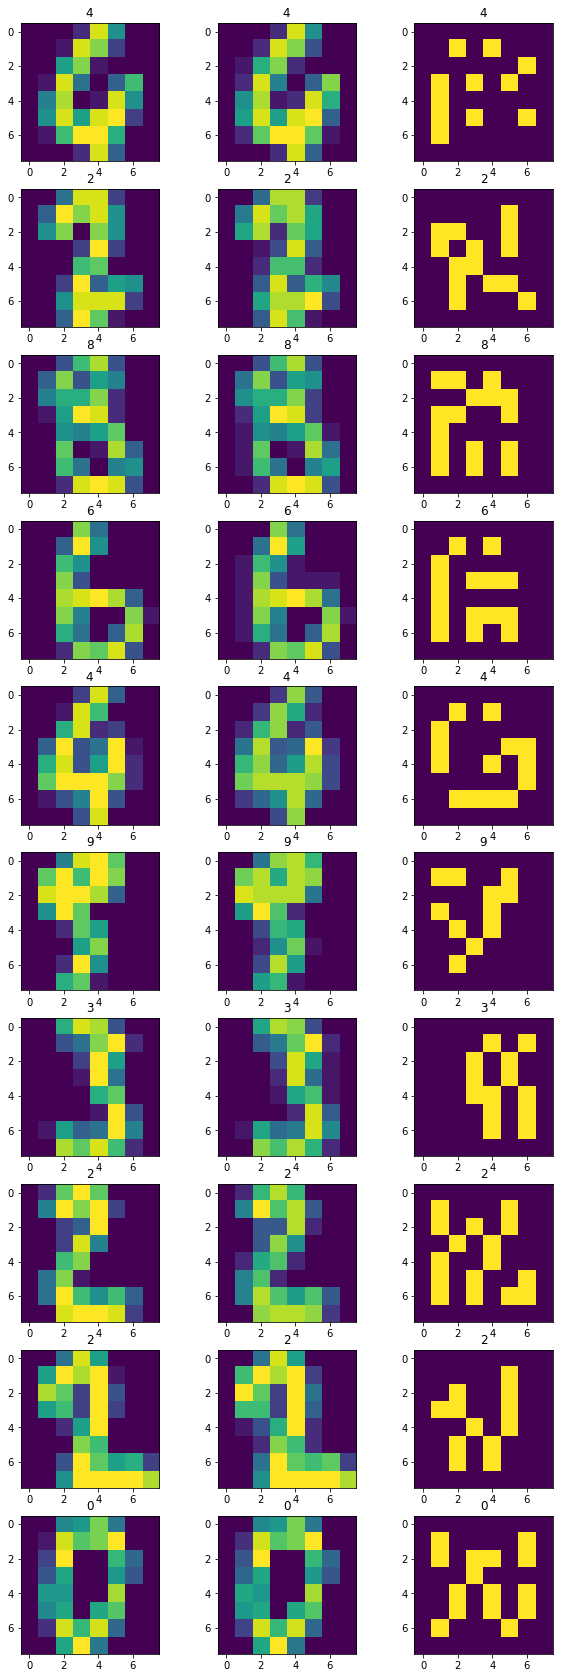

In [12]:
sample = df_train.sample(10,axis=0)
fig,ax = plt.subplots(10,3,figsize=(10,30))
for idx,data in enumerate(sample.as_matrix()):
    arr = np.reshape(data,(int(np.sqrt(len(data))),int(np.sqrt(len(data)))))
    img_gray = rgb2gray(arr)
    edge_canny = feature.canny(arr,sigma=0.75,low_threshold=10,high_threshold=30)
    edge_canny2 = feature.canny(arr,sigma=0.5,low_threshold=15,high_threshold=50)
    img_gray = img_gray+edge_canny+edge_canny2
    edge_laplace = filters.laplace(arr,ksize=3)
    edge_laplace = feature.canny(edge_laplace,sigma=0.5,low_threshold=10,high_threshold=20)
    ax[idx,0].imshow(arr)
    ax[idx,0].set_title(y[sample.index[idx]])
    ax[idx,1].imshow(img_gray)
    ax[idx,1].set_title(y[sample.index[idx]])
    ax[idx,2].imshow(edge_laplace)
    ax[idx,2].set_title(y[sample.index[idx]])
    

/Users/shubhamchitranshi/anaconda3/envs/temp/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


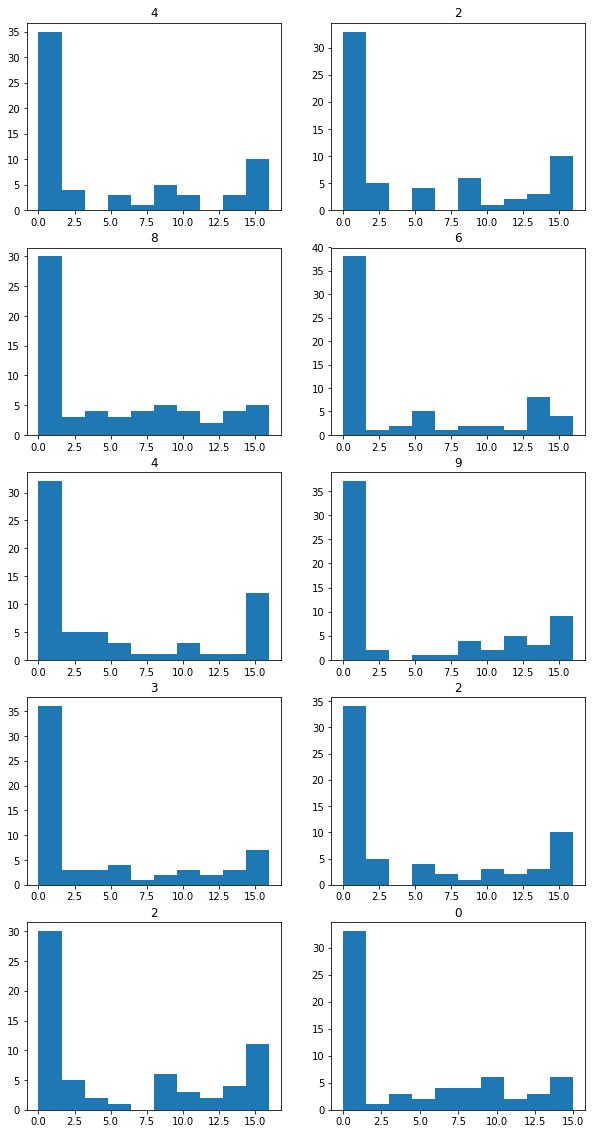

In [13]:
fig, ax = plt.subplots(5,2,figsize=(10,20))
for idx,data in enumerate(sample.as_matrix()):
    ax[idx//2,idx%2].hist(data)
    ax[idx//2,idx%2].set_title(str(y[sample.index[idx]]))